In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\umair-durrani\posts\2023-04-15-classifying-traffic-signs':
  os.chdir(r'D:\umair-durrani\posts\2023-04-15-classifying-traffic-signs')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\umair\AppData\Local\Temp\ipykernel_20432\3311684388.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap_external.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\codecs.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\encodings\\aliases.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\encodings\\__init__.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\encodings\\utf_8.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\abc.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\io.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\stat.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\_collections_abc.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\genericpath.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\envs\\homl3\\lib\\ntpath.py": 1675771545.0, "C:\\Users\\umair\\anaconda3\\e

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import pandas as pd
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
train_data['labels']

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3

In [5]:
train_data['features'][:1, :, :, 1]

array([[[ 25,  24,  24,  24,  25,  27,  39,  33,  28,  41,  75,  91,  76,  74,  87,  97,  81,  65,  50,  43,  49,  55,  32,  32,  37,  34,  29,  28,  28,  28,  27,  27],
        [ 26,  25,  25,  25,  25,  26,  35,  34,  30,  36,  58,  70,  73,  79,  90,  99,  90,  83,  74,  66,  60,  44,  28,  31,  36,  33,  28,  28,  28,  28,  27,  27],
        [ 26,  25,  25,  25,  25,  25,  30,  32,  30,  31,  44,  53,  66,  82,  92,  98,  96,  88,  78,  67,  54,  30,  26,  32,  35,  31,  28,  28,  28,  28,  27,  27],
        [ 25,  24,  24,  24,  25,  24,  27,  30,  29,  28,  36,  40,  53,  69,  81,  84,  84,  72,  60,  49,  37,  23,  29,  33,  33,  28,  27,  29,  28,  28,  27,  26],
        [ 26,  25,  24,  24,  24,  24,  28,  33,  32,  28,  28,  26,  25,  30,  40,  48,  41,  34,  28,  24,  22,  29,  38,  35,  29,  26,  28,  31,  30,  29,  27,  25],
        [ 24,  24,  23,  23,  24,  25,  27,  29,  30,  30,  27,  33,  32,  28,  26,  26,  25,  27,  29,  29,  27,  36,  34,  29,  27,  26,  26,  27,  

In [6]:
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# 4 dimensional
print("X_train shape:\n\n", X_train.shape, "\n")
print("X_test shape:\n\n", X_test.shape)

print("=========\n=========\n")

print("y_train shape:\n\n", y_train.shape, "\n")
print("y_test shape:\n\n", y_test.shape)

X_train shape:

 (34799, 32, 32, 3) 

X_test shape:

 (12630, 32, 32, 3)

y_train shape:

 (34799,) 

y_test shape:

 (12630,)


In [7]:
np.random.seed(42)
num_images = 5
random_indices = np.random.choice(X_train.shape[0], num_images, replace=False)
random_images = X_train[random_indices]

first_image = random_images[0]

np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(first_image[:,:,0])

[[ 89  86  86  84  84  83  74  67  75  81  75  90  87  70  75  86 103  88  81  77  69  71  64  59  65  64  60  50  47  61  74  63]
 [ 86  88  83  80  82  83  81  69  79  73  70  88  83  73  75  87 103  83  73  73  65  72  73  66  71  74  67  56  47  47  59  60]
 [101 104  87  83  83  79  78  71  79  73  81  88  83  74  75  87 101  80  73  71  65  63  66  68  71  75  70  64  58  56  59  61]
 [101  98  87  90  85  76  68  72  79  81  96 104  94  77  86 119 122  88  78  70  64  63  62  64  65  64  65  68  71  71  62  62]
 [ 90  89  96  96  84  75  68  76  90  92  93  97  93  82 126 168 164 110  84  75  62  61  57  57  59  54  57  69  76  75  65  59]
 [ 82  82  96  96  82  77  77  86 104  95  77  70  72  94 170 170 195 148  94  75  63  54  52  58  56  47  59  83  91  82  67  55]
 [ 85  90 103  97  81  77  78  82  93  88  82  70  86 148 174 167 187 188 108  88  71  51  49  57  56  53  67  78  88  78  72  58]
 [ 77  86  97  86  79  80  79  83  86  84  82  79 111 193 180 173 172 185 140  93  

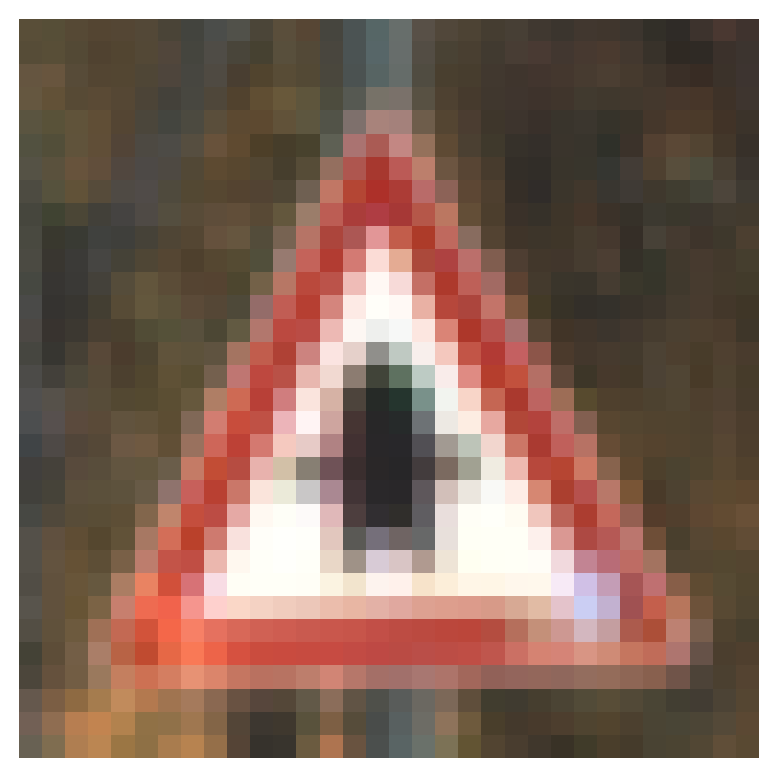

In [8]:
plt.imshow(random_images[0]);
plt.axis('off');

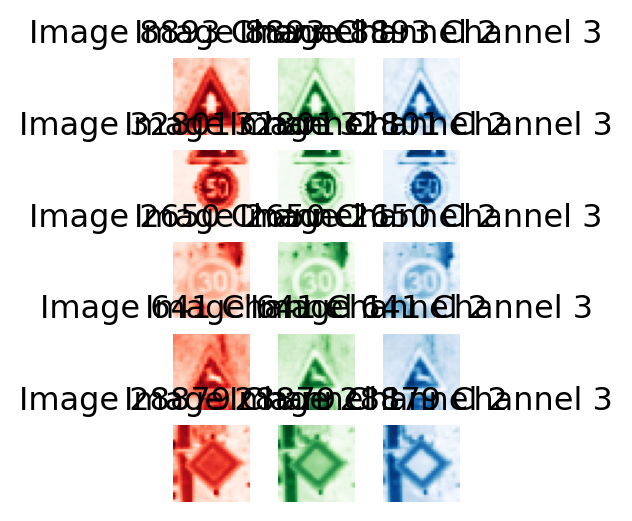

In [9]:
plot = plt.figure()
plot.set_figwidth(2)
plot.set_figheight(3)
# plot each channel for the random images
for i in range(num_images):
    for j in range(3):
        plt.subplot(num_images, 3, i*3+j+1)
        if j == 0: # Red channel
            plt.imshow(random_images[i][:,:,j], cmap='Reds')
        elif j == 1: # Green channel
            plt.imshow(random_images[i][:,:,j], cmap='Greens')
        elif j == 2: # Blue channel
            plt.imshow(random_images[i][:,:,j], cmap='Blues')
        plt.axis('off')
        plt.title('Image {} Channel {}'.format(random_indices[i]+1, j+1))

plt.show()

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


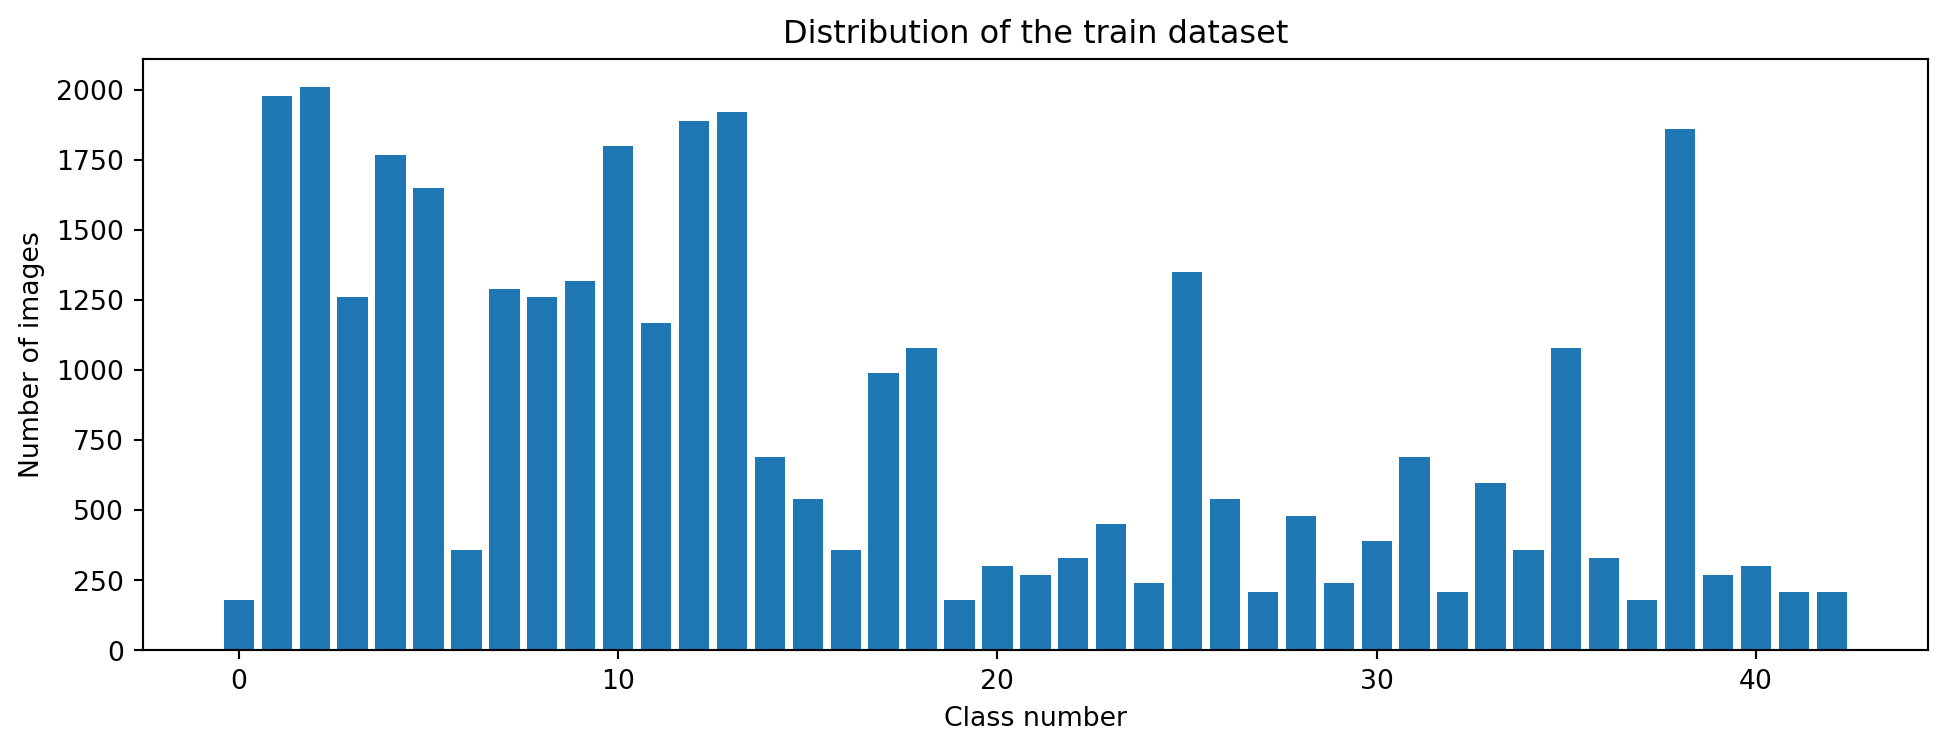

In [11]:
num_of_samples=[]

cols = 5
num_classes = 43



for i, row in data.iterrows():
  x_selected = X_train[y_train == i]
  num_of_samples.append(len(x_selected))
  
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [12]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
  
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
  
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
  
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))

In [13]:
num_pixels = (X_train.shape[1] * X_train.shape[2])

X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


print(X_train.shape)
print(X_test.shape)

(34799, 1024)
(12630, 1024)


In [14]:
clf = RandomForestClassifier(random_state=0,  n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [15]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [16]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", np.round(accuracy_train))

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", np.round(accuracy_test))

Train Accuracy: 1.0
Test Accuracy: 1.0


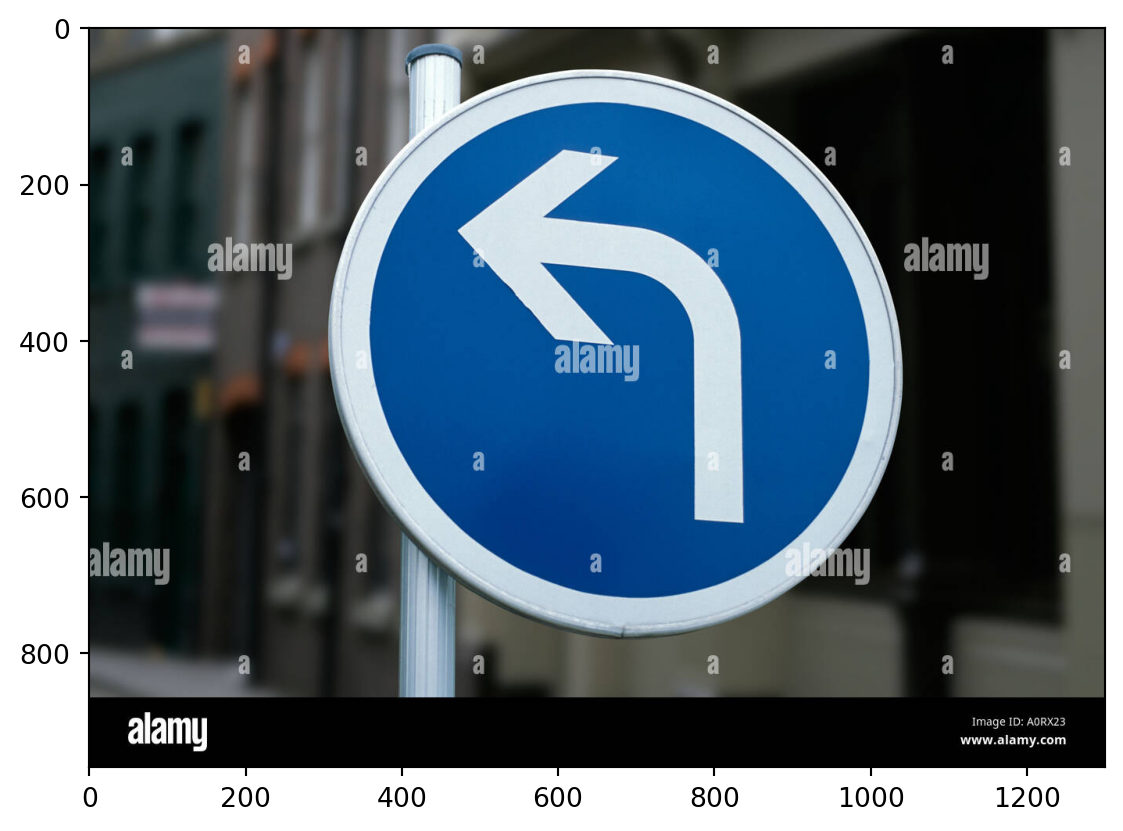

In [17]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [18]:
def preprocess2(img):
  img = np.asarray(img)
  img = cv2.resize(img, (32, 32))
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  img = img.reshape(1, 1024)
  return img

img = preprocess2(img)

In [19]:
print("predicted sign: "+ str(clf.predict(img)))

predicted sign: [12]
